In [1]:
import json
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report


with open('data.json', 'r') as f:
    data = json.load(f)

intents = data['intents']

X = []
y = []

for intent in intents:
    for pattern in intent['patterns']:
        X.append(pattern)
        y.append(intent['tag'])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#tfidf 
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


labels = list(set(y_train))
label_to_idx = {label: idx for idx, label in enumerate(labels)}
y_train_numeric = np.array([label_to_idx[label] for label in y_train])
y_test_numeric = np.array([label_to_idx[label] for label in y_test])

#hyperparameters for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'] + [0.001, 0.01, 0.1, 1, 10]
}

#model
svm_model = SVC()
grid_search = GridSearchCV(svm_model, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_tfidf, y_train_numeric)

#best model from GridSearchCV
best_svm_model = grid_search.best_estimator_
y_pred_numeric = best_svm_model.predict(X_test_tfidf)
pred_labels = [labels[idx] for idx in y_pred_numeric]

print(classification_report(y_test, pred_labels))



C:\Users\relyd\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


                                                       precision    recall  f1-score   support

                          About_IOD_Protocol_Approval       0.00      0.00      0.00         0
                        About_Radiographic_Guide_CBCT       1.00      1.00      1.00         2
                About_Radiographic_Guide_CBCT_Patient       1.00      0.50      0.67         2
           About_Radiographic_Guide_CBCT_Review_Scans       0.50      1.00      0.67         1
        About_Radiographic_Guide_CBC_Faculty_Approval       1.00      0.67      0.80         3
                          About_STI_Crown_Appointment       0.50      1.00      0.67         1
               About_STI_Extraction_Site_Preservation       0.00      0.00      0.00         1
                          About_STI_Protocol_Approval       1.00      1.00      1.00         1
                   About_STI_Protocol_Custom_Abutment       1.00      1.00      1.00         2
                          About_STI_Protocol_Disc

C:\Users\relyd\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\relyd\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\relyd\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\

In [2]:
import random
import json
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


with open('data.json', 'r') as json_data:
    intents = json.load(json_data)

# Extract data from JSON
X = []
y = []

for intent in intents['intents']:
    for pattern in intent['patterns']:
        X.append(pattern)
        y.append(intent['tag'])

# Vectorize data using Bag of Words (BoW)
vectorizer = CountVectorizer()
X_bow = vectorizer.fit_transform(X)

# Labels to numerical values
labels = list(set(y))
label_to_idx = {label: idx for idx, label in enumerate(labels)}
y_numeric = np.array([label_to_idx[label] for label in y])

# Hyperparameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'] + [0.001, 0.01, 0.1, 1, 10]
}

# SVM Model 
svm_model = SVC()
grid_search = GridSearchCV(svm_model, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_bow, y_numeric)

# Get best model from GridSearchCV
best_svm_model = grid_search.best_estimator_

# Classify intent from user input 
def classify_intent(user_input):
    user_input_bow = vectorizer.transform([user_input])
    predicted_label_numeric = best_svm_model.predict(user_input_bow)
    predicted_label = labels[predicted_label_numeric[0]]
    return predicted_label

# ... (Rest of your code remains the same)


C:\Users\relyd\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


In [8]:
# ... (Previous code)

# SVM Model
svm_model = SVC()
grid_search = GridSearchCV(svm_model, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_bow, y_numeric)

# Get best model from GridSearchCV
best_svm_model = grid_search.best_estimator_

# ... (Previous code)

# Predict labels for the test set
y_pred_numeric = best_svm_model.predict(X_bow)
pred_labels = [labels[idx] for idx in y_pred_numeric]

# Print classification report
print(classification_report(y, pred_labels))

# ... (Rest of your code)


C:\Users\relyd\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


                                                       precision    recall  f1-score   support

                          About_IOD_Protocol_Approval       1.00      1.00      1.00         4
                        About_Radiographic_Guide_CBCT       1.00      1.00      1.00         5
                 About_Radiographic_Guide_CBCT_Barium       1.00      1.00      1.00         3
                About_Radiographic_Guide_CBCT_Patient       1.00      1.00      1.00         4
           About_Radiographic_Guide_CBCT_Review_Scans       1.00      1.00      1.00         6
        About_Radiographic_Guide_CBC_Faculty_Approval       1.00      1.00      1.00         5
                          About_STI_Crown_Appointment       1.00      1.00      1.00         6
               About_STI_Extraction_Site_Preservation       1.00      1.00      1.00         6
                          About_STI_Protocol_Approval       1.00      1.00      1.00         6
                   About_STI_Protocol_Custom_Abut

C:\Users\relyd\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


                                                       precision    recall  f1-score   support

                          About_IOD_Protocol_Approval       1.00      1.00      1.00         4
                        About_Radiographic_Guide_CBCT       1.00      1.00      1.00         5
                 About_Radiographic_Guide_CBCT_Barium       1.00      1.00      1.00         3
                About_Radiographic_Guide_CBCT_Patient       1.00      1.00      1.00         4
           About_Radiographic_Guide_CBCT_Review_Scans       1.00      1.00      1.00         6
        About_Radiographic_Guide_CBC_Faculty_Approval       1.00      1.00      1.00         5
                          About_STI_Crown_Appointment       1.00      1.00      1.00         6
               About_STI_Extraction_Site_Preservation       1.00      1.00      1.00         6
                          About_STI_Protocol_Approval       1.00      1.00      1.00         6
                   About_STI_Protocol_Custom_Abut

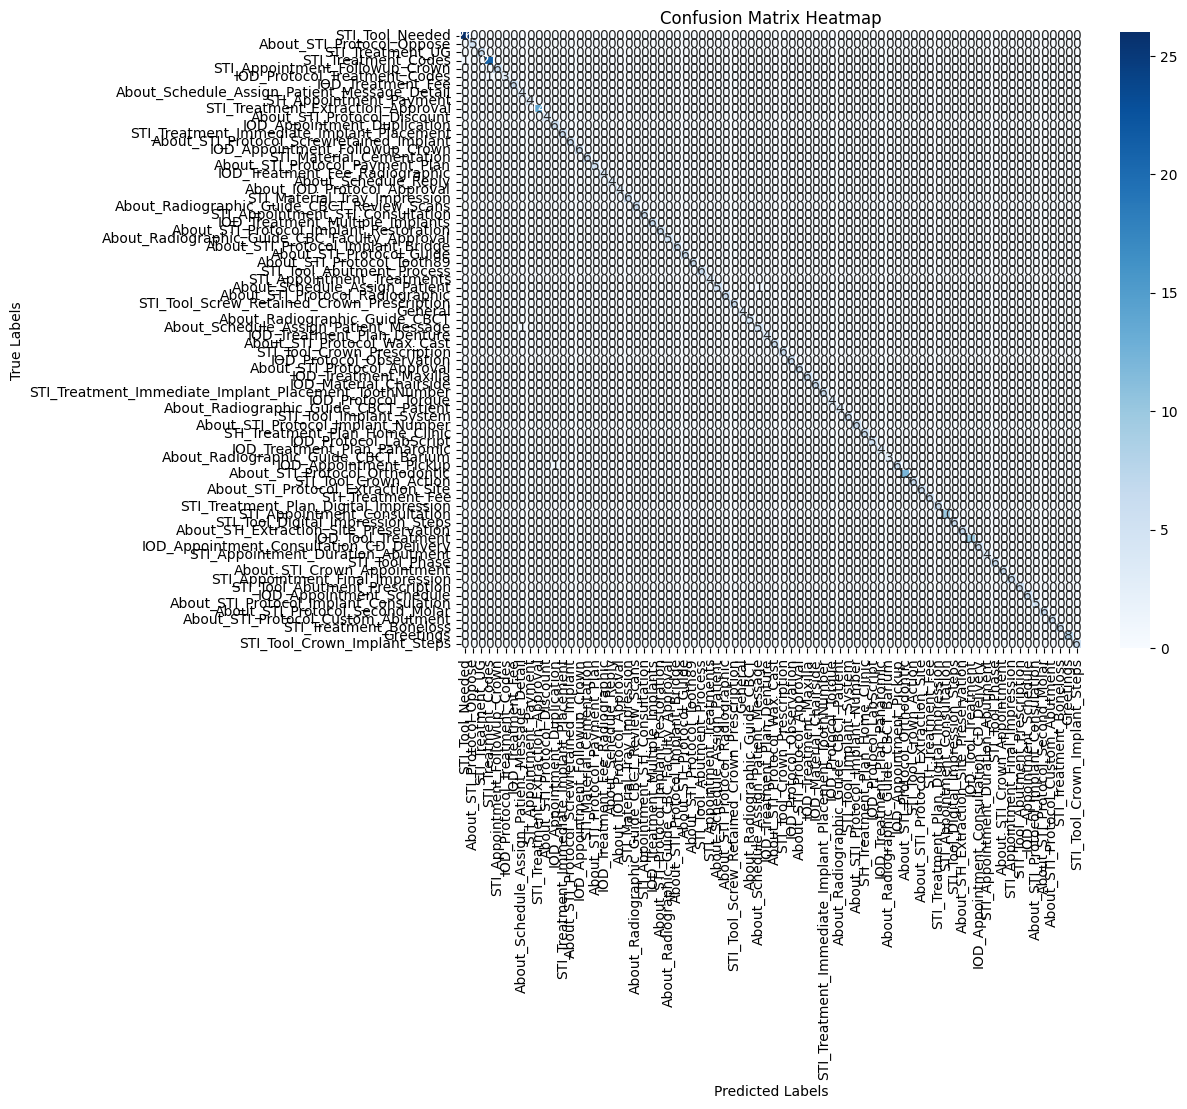

In [9]:
import random
import json
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

with open('data.json', 'r') as json_data:
    intents = json.load(json_data)

# Extract data from JSON
X = []
y = []

for intent in intents['intents']:
    for pattern in intent['patterns']:
        X.append(pattern)
        y.append(intent['tag'])

# Vectorize data
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X)

# Labels to numerical values
labels = list(set(y))
label_to_idx = {label: idx for idx, label in enumerate(labels)}
y_numeric = np.array([label_to_idx[label] for label in y])

# Hyperparameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'] + [0.001, 0.01, 0.1, 1, 10]
}

# SVM Model 
svm_model = SVC()
grid_search = GridSearchCV(svm_model, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_tfidf, y_numeric)

# Get best model from GridSearchCV
best_svm_model = grid_search.best_estimator_

# Predict labels for the test set
y_pred_numeric = best_svm_model.predict(X_tfidf)
pred_labels = [labels[idx] for idx in y_pred_numeric]

# Print classification report
print(classification_report(y, pred_labels))

# Create and print confusion matrix heatmap
conf_matrix = confusion_matrix(y, pred_labels, labels=labels)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

# ... (Rest of your code)


In [4]:

def chatbot_loop():
    bot_name = "Chatbot"
    print("Let's chat! (type 'Quit' to exit)")
    while True:
        user_input = input("You: ")
        if user_input == "Quit":
            break
        
        user_input_tfidf = vectorizer.transform([user_input]) 
        intent = classify_intent(user_input)
        
        similarity_scores = user_input_tfidf.dot(X_tfidf.T).toarray()[0]
        max_similarity = np.max(similarity_scores)

        print(f"You: {user_input}")
        if max_similarity < 0.5:
            print(f"{bot_name}: I do not understand...")
        else:
            for intent_data in intents['intents']:
                if intent_data['tag'] == intent:
                    responses = intent_data['responses']
                    response = f"{bot_name}: " + random.choice(responses)
                    break
            else:
                response = f"{bot_name}: I do not understand..."

            print(response)

chatbot_loop()


Let's chat! (type 'Quit' to exit)
